## A step-by-step guide to Data Visualizations in Python

Follow along with [this article](https://medium.com/codex/step-by-step-guide-to-data-visualizations-in-python-b322129a1540).  We will be using [this .xlsx dataset](https://www.kaggle.com/roshansharma/immigration-to-canada-ibm-dataset) from Kaggle on Immigration to Canada from 1980–2013. No need to dowload it, it is already in the git repositroy you forked.<br>

#### We suggest that instead of copy and pasting the code, you type it out.  This will help you become more familiar with the syntex and better understand it.


### Step-1: Importing Packages

In [5]:
#import all librarys and modules needed
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import style

style.use('ggplot')
plt.rcParams['figure.figsize']=(20,10)

### Step-2 : Importing and Cleaning Data 

In [15]:
#import and clean data, remember path is data/Canada.xlsx
data = pd.read_excel('data/Canada.xlsx', 1, skiprows = range(20), skipfooter = 2)
data.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage', 'DevName'], axis=1, inplace=True)
data.rename(columns= {'OdName': 'country', 'AreaName':'continent', 'RegName':'region'}, inplace=True)
data['total'] = data.sum(axis = 1)
data= data.set_index('country')
data.rename(index={'United Kingdom of Great Britain and Northern Ireland': 'UK & Ireland'}, inplace=True)
data.columns = data.columns.astype(str)

years = list(map(str, range(1980,2013)))

### Step-3 : Creating Beautiful Visualizations

#### Line Chart

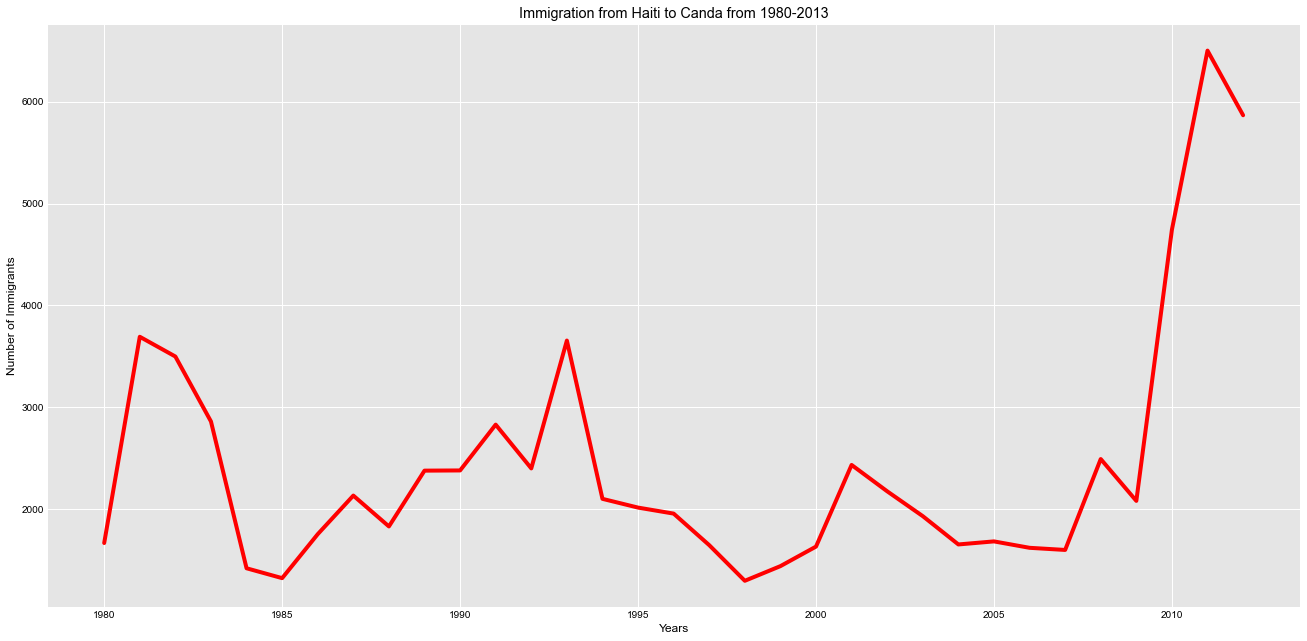

In [16]:
# Single line chart

fig1 = data.loc['Haiti', years].plot(kind='line', color = 'r')
plt.title('Immigration from Haiti to Canda from 1980-2013', color = 'black')
plt.xlabel('Years', color = 'black')
plt.ylabel('Number of Immigrants', color= 'black')
plt.xticks(color='black')
plt.yticks(color='black')
plt.savefig('linechart_single.png')
plt.style.use('bmh')

plt.show()

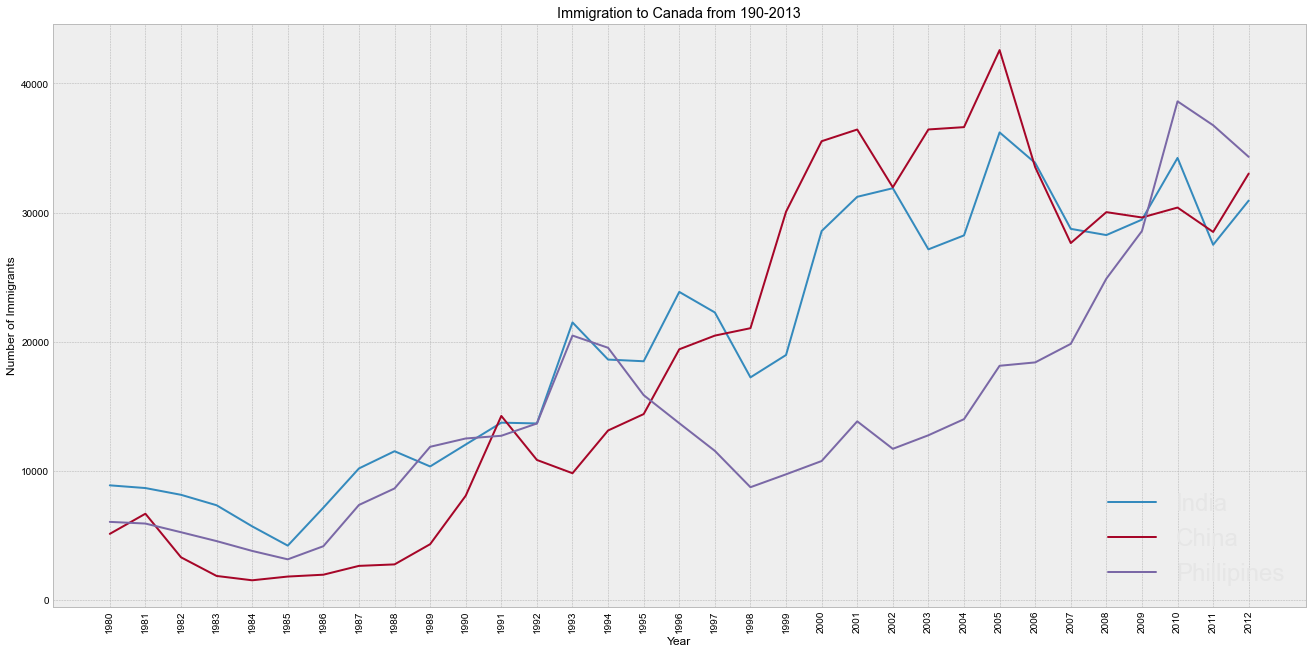

In [17]:
# Multiple Line chart 
fig2 = plt.plot(data.loc['India', years], label='India')
plt.plot(data.loc['China', years], label='China')
plt.plot(data.loc['Philippines', years], label = 'Phillipines')
plt.legend(loc = 'lower right', fontsize=24)
plt.xticks(rotation= 90, color='black')
plt.yticks(color='black')
plt.title('Immigration to Canada from 190-2013', color = 'black')
plt.xlabel('Year', color='black')
plt.ylabel('Number of Immigrants', color='black')
plt.savefig('linechart_multiple.png')
plt.style.use('fivethirtyeight')

plt.show()

#### Lets talk about style   

In [18]:
#Shows all avaiable built-in styles
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


To see a visualization of the aviable style sheets [click here](https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html). 

Syntex to select a specific style is: plt.style.use('style_name') 

Try it out by adding the line of code to the top of the code block above and choose one of the preinstalled styles. Which style is your favorite?<br><br>

What happens when you change the line- plt.legend(loc = 'upper left', fontsize = 12) to plt.legend(loc = 'lower right', fontsize = 12)? <br><br><br><br>



Experiment changing other lines of the code and see how the graph changes. Add any notes or observations here. Going forward feel free to experiment with each graph type<br><br><br><br><br><br>

#### Install mplcyberpunk
Open a terminal window and at at the prompt type:

python -V

If its python 3.something, copy and paste: pip install mplcyberpunk
If its python 2.something, copy and paste: pip3 install mplcyberpunk


For more info on mplcyberpunk click [here.](https://github.com/dhaitz/mplcyberpunk)

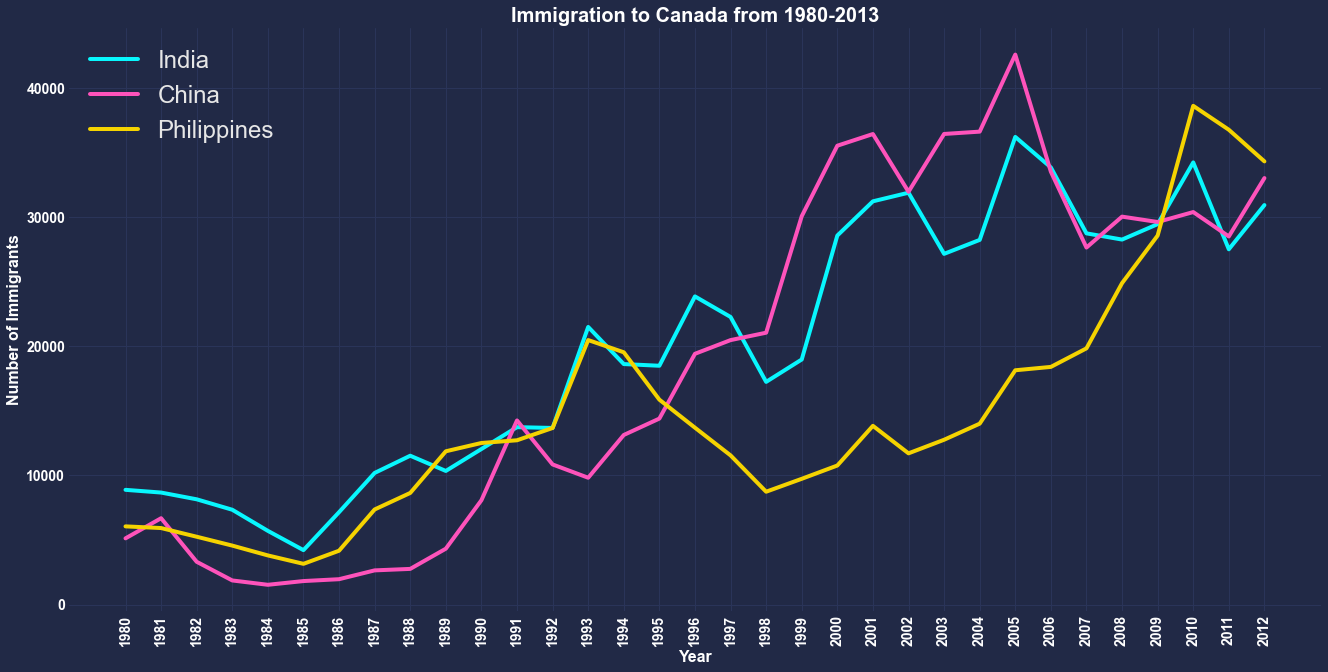

In [19]:
# Cyberpunk Multiple Line Chart
import mplcyberpunk
style.use('cyberpunk')

plt.plot(data.loc['India', years], label = "India")
plt.plot(data.loc['China', years], label= "China")
plt.plot(data.loc['Philippines', years], label = "Philippines")
plt.legend(loc="upper left", fontsize= 24)
plt.xticks(rotation= 90, color='white', fontsize=14, fontweight='bold')
plt.yticks(color='white', fontsize = 14, fontweight='bold')
plt.title('Immigration to Canada from 1980-2013', color= 'white', fontsize= 20, fontweight = 'bold')
plt.xlabel('Year', color = 'white', fontsize= 16, fontweight='bold')
plt.ylabel('Number of Immigrants', color='white', fontsize=16, fontweight='bold')
plt.savefig('cyber_line.png')

plt.show()

#### Bar Chart

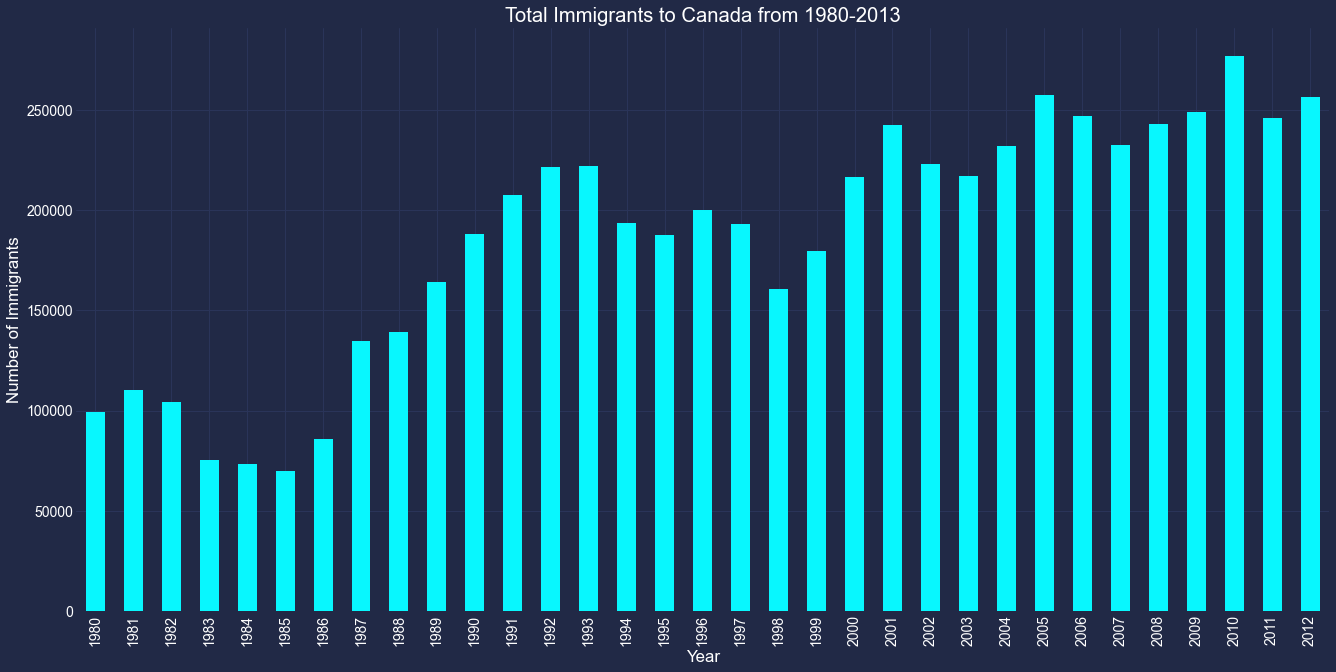

In [20]:
# Vertical bar chart
# Do not change the style back to ggplot 
# delete the style.use('ggplot') line of code
data_tot = pd.DataFrame(data.loc[:, years].sum())
data_tot.rename(columns = {0: 'total'}, inplace=True)

data_tot.plot(kind='bar', legend=False)
plt.title('Total Immigrants to Canada from 1980-2013', color='white')
plt.xticks(color='white')
plt.yticks(color='white')
plt.xlabel('Year', color='white')
plt.ylabel('Number of Immigrants', color='white')
plt.savefig('bar_vertical.png')

plt.show()

Notice that style is still set to cyberpunk.  How do we fix it so we can see the labels?<br> <br>

Answer: change the color = 'black' to 'white'

Feel free to experiment and add any notes or observations here. <br><br><br><br><br>

In [21]:
test = data.nlargest(10,'total')
test

,continent,region,1980,1981,1982,1983,1984,1985,1986,1987,...,2013,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,total
country,,,,,,,,,,,,,,,,,,,,,
India,Asia,Southern Asia,8880,8670,8147,7338,5704,4211,7150,10189,...,33087,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,691904.0
China,Asia,Eastern Asia,5123,6682,3308,1863,1527,1816,1960,2643,...,34129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,659962.0
UK & Ireland,Europe,Northern Europe,22045,24796,20620,10015,10170,9564,9470,21337,...,5827,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,551500.0
Philippines,Asia,South-Eastern Asia,6051,5921,5249,4562,3801,3150,4166,7360,...,29544,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,511391.0
Pakistan,Asia,Southern Asia,978,972,1201,900,668,514,691,1072,...,12603,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,241600.0
United States of America,Northern America,Northern America,9378,10030,9074,7100,6661,6543,7074,7705,...,8501,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,241122.0
Iran (Islamic Republic of),Asia,Southern Asia,1172,1429,1822,1592,1977,1648,1794,2989,...,11291,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,175923.0
Sri Lanka,Asia,Southern Asia,185,371,290,197,1086,845,1838,4447,...,2394,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,148358.0
Republic of Korea,Asia,Eastern Asia,1011,1456,1572,1081,847,962,1208,2338,...,4509,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,142581.0


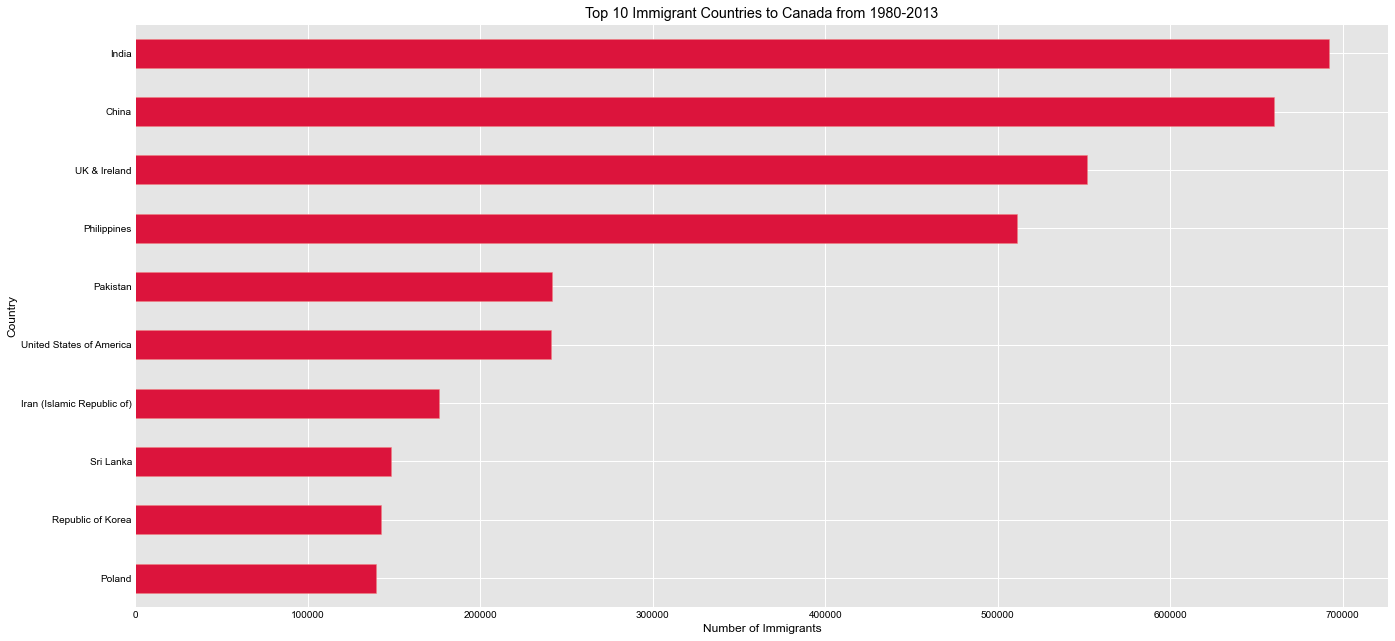

In [22]:
# Horizontal bar chart
#change style back to ggplt
style.use('ggplot')

df_top10 = pd.DataFrame(data.nlargest(10,'total')['total'].sort_values(ascending = True))

df_top10.plot.barh(legend = False, color = 'crimson', edgecolor = 'lightcoral')
plt.title('Top 10 Immigrant Countries to Canada from 1980-2013',color = 'black')
plt.xlabel('Number of Immigrants',color = 'black')
plt.ylabel('Country',color = 'black')
plt.xticks(color = 'black')
plt.yticks(color = 'black')
plt.savefig('bar_horizontal.png')


plt.show()

Feel free to experiment and add any notes or observations here. <br><br><br><br><br>

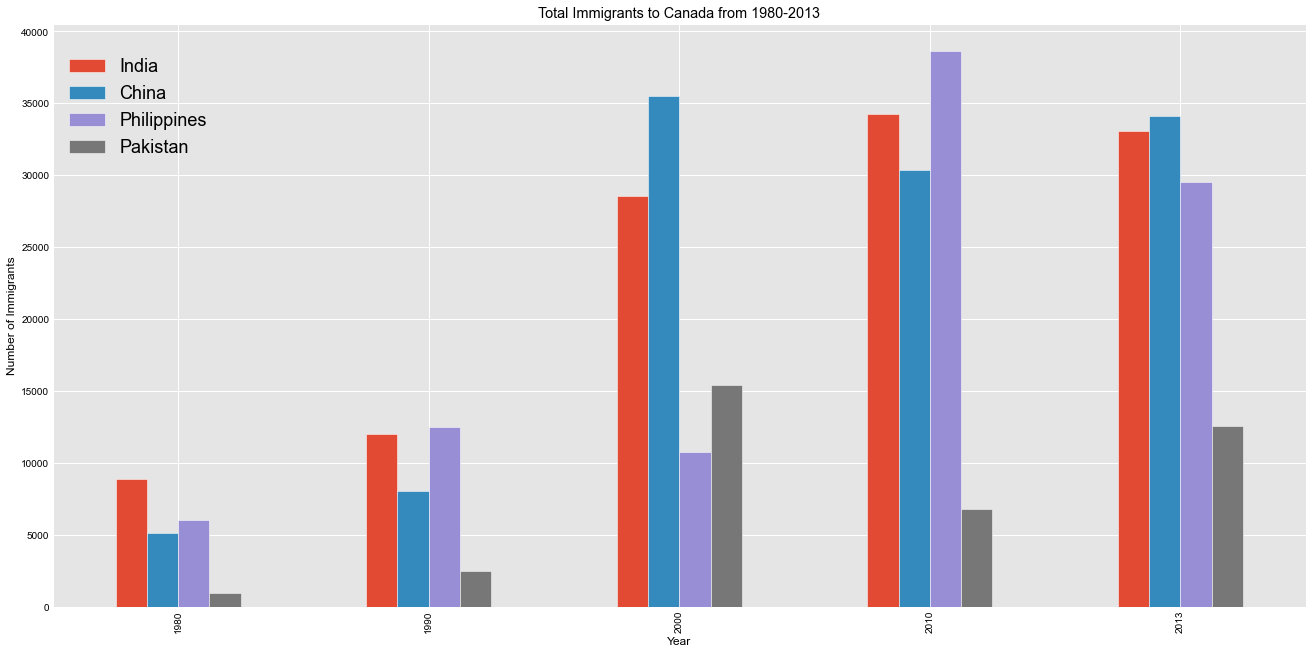

In [28]:
# Grouped bar chart
year_int10 = list(map(str, (1980, 1990, 2000, 2010, 2013)))
data_group = pd.DataFrame(data.loc[['India', 'China', 'Philippines', 'Pakistan'], year_int10].T)

data_group.plot.bar(edgecolor='white')
plt.title('Total Immigrants to Canada from 1980-2013', color= 'black')
plt.xticks(color = 'black')
plt.yticks(color = 'black')
plt.xlabel('Year',color = 'black')
plt.ylabel('Number of Immigrants',color = 'black')
plt.legend(title = 'Country', fontsize = 18, labelcolor='black')
plt.savefig('bar_grouped.png')
style.use('ggplot')

plt.show()

Notice how the labels in the legend have disapeared?  We can fix this by adding labelcolor='k' to plt.legend<br>
<br>plt.legend(title = 'Country', fontsize = 12, labelcolor='black')



Feel free to experiment and add any notes or observations here. <br><br><br><br><br>

#### Area Chart

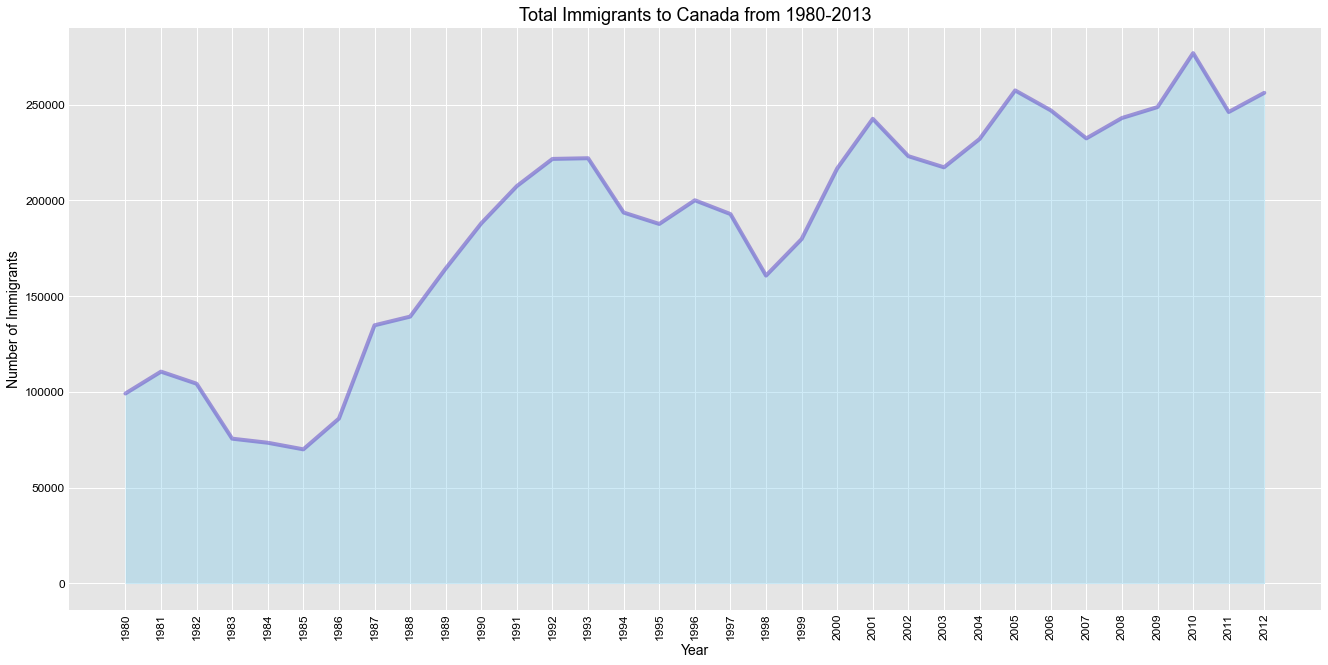

In [29]:
# Area Chart
plt.fill_between(data_tot.index, data_tot['total'], color='skyblue', alpha=0.4)
plt.plot(data_tot.index, data_tot['total'], color='Slateblue', alpha=0.6)
plt.title('Total Immigrants to Canada from 1980-2013', fontsize= 18, color= 'black')
plt.yticks(fontsize=12, color='black')
plt.xticks(fontsize=12, rotation=90, color= 'black')
plt.xlabel('Year', fontsize=14, color='black')
plt.ylabel('Number of Immigrants', fontsize=14, color='black')
plt.savefig('area_simple.png')

plt.show()


Feel free to experiment and add any notes or observations here. <br><br><br><br><br>

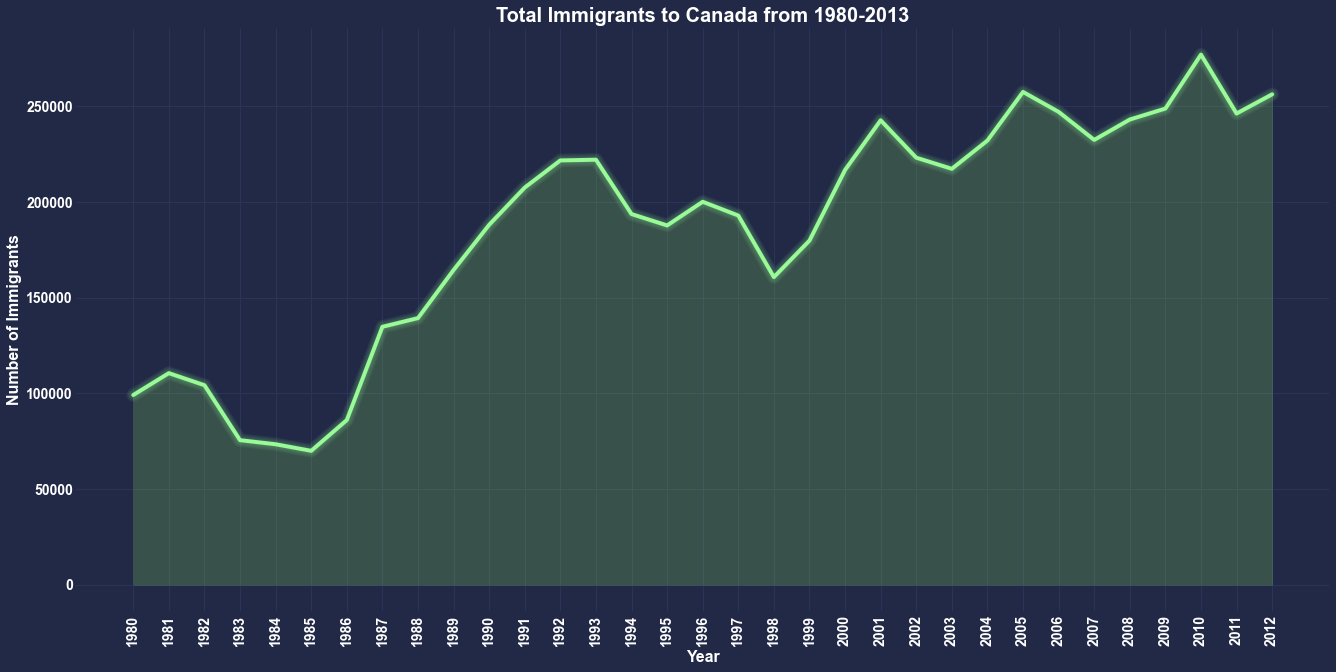

In [30]:
# cyberpunk simple area chart
import mplcyberpunk

style.use('cyberpunk')

plt.fill_between(data_tot.index, data_tot['total'], color='greenyellow', alpha=0.1)
plt.plot(data_tot.index, data_tot['total'], color = 'palegreen', alpha = 1)
mplcyberpunk.add_glow_effects()
plt.title('Total Immigrants to Canada from 1980-2013', fontsize = 20, fontweight = 'bold', color='white')
plt.yticks(fontsize=14, color='white', fontweight='bold')
plt.xticks(fontsize=14, rotation= 90, color = 'white', fontweight='bold')
plt.xlabel('Year',fontsize =16, color='white', fontweight='bold')
plt.ylabel('Number of Immigrants', fontsize=16, color='white', fontweight='bold')
plt.savefig('cyber_area_simple.png')
plt.show()
           

Feel free to experiment and add any notes or observations here. <br><br><br><br><br>

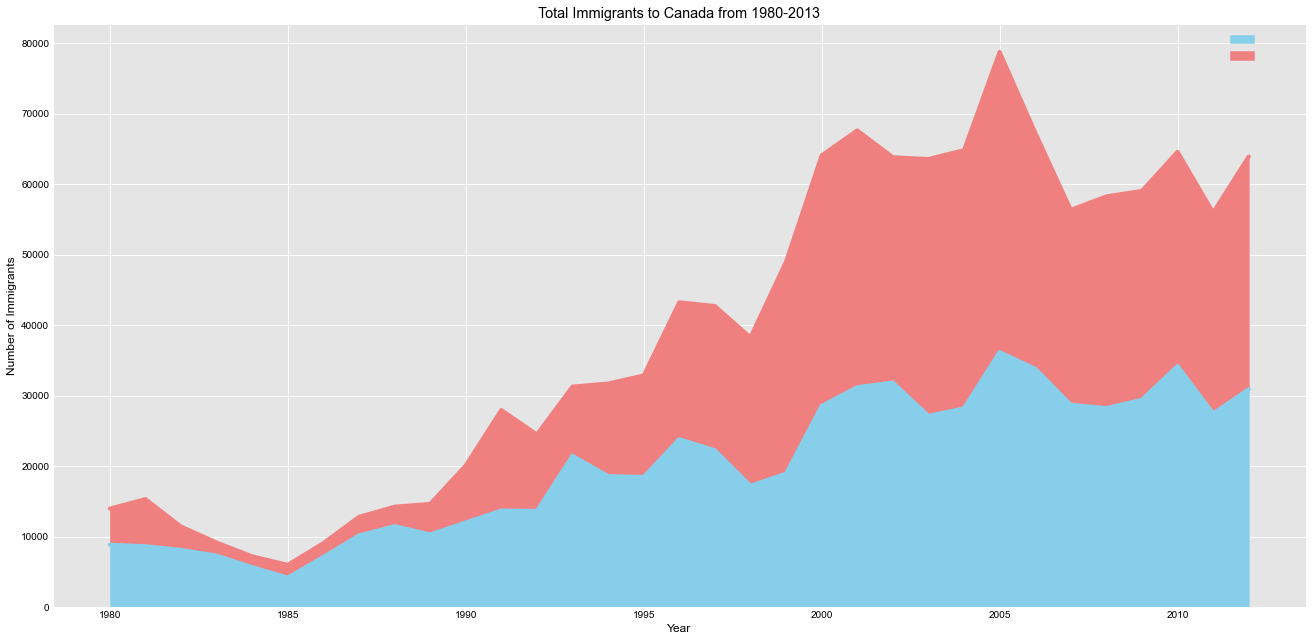

In [34]:
# stacked area chart
color = ['skyblue','lightcoral']
top2_list = data.nlargest(2, 'total').index.tolist()
df_top2 = pd.DataFrame(data.loc[top2_list, years].T)

df_top2.plot(kind = 'area', stacked = True, color = color)
plt.title('Total Immigrants to Canada from 1980-2013',color = 'black')
plt.legend(fontsize = 12)
plt.xlabel('Year',color = 'black')
plt.ylabel('Number of Immigrants',color = 'black')
plt.xticks(color = 'black')
plt.yticks(color = 'black')
plt.savefig('area_stacked.png')

plt.show()

Feel free to experiment and add any notes or observations here. <br><br><br><br><br>

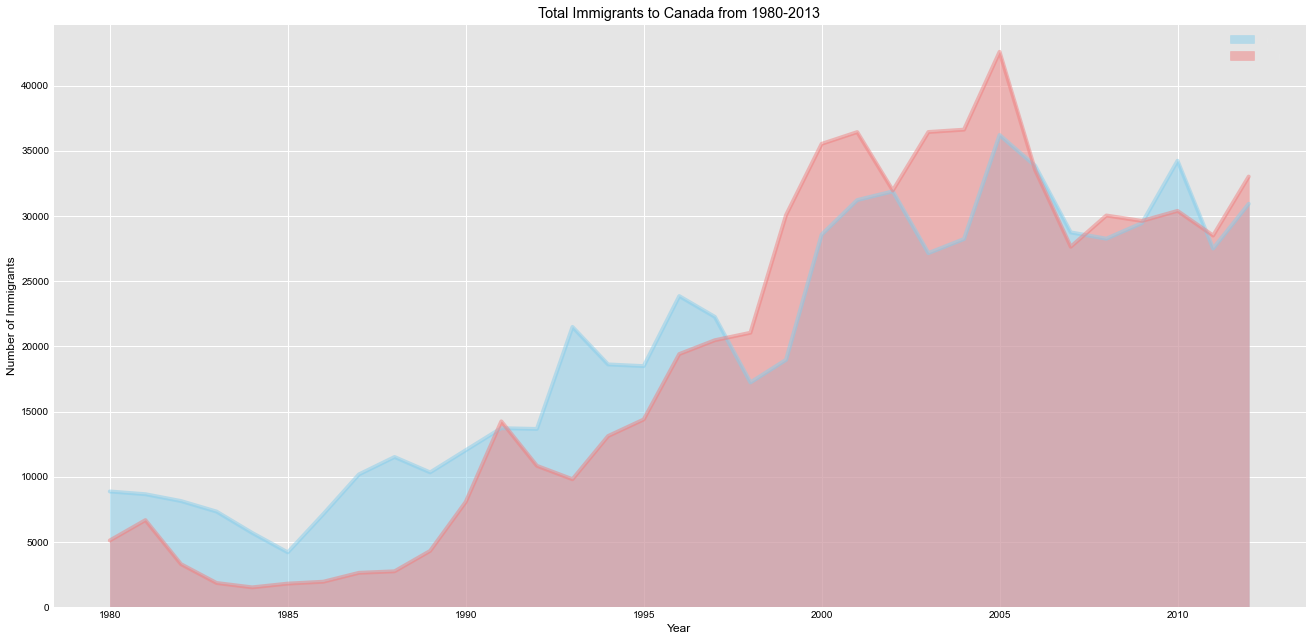

In [26]:
# unstacked area chart
top2_list = data.nlargest(2, 'total').index.tolist()
df_top2 = pd.DataFrame(data.loc[top2_list, years].T)

df_top2.plot(kind = 'area', stacked = False, color = color)
plt.title('Total Immigrants to Canada from 1980-2013',color = 'black')
plt.xlabel('Year',color = 'black')
plt.ylabel('Number of Immigrants',color = 'black')
plt.legend(fontsize = 12)
plt.xticks(color = 'black')
plt.yticks(color = 'black')
plt.savefig('area_unstacked.png')

plt.show()

Feel free to experiment and add any notes or observations here. <br><br><br><br><br>

#### Box Plot

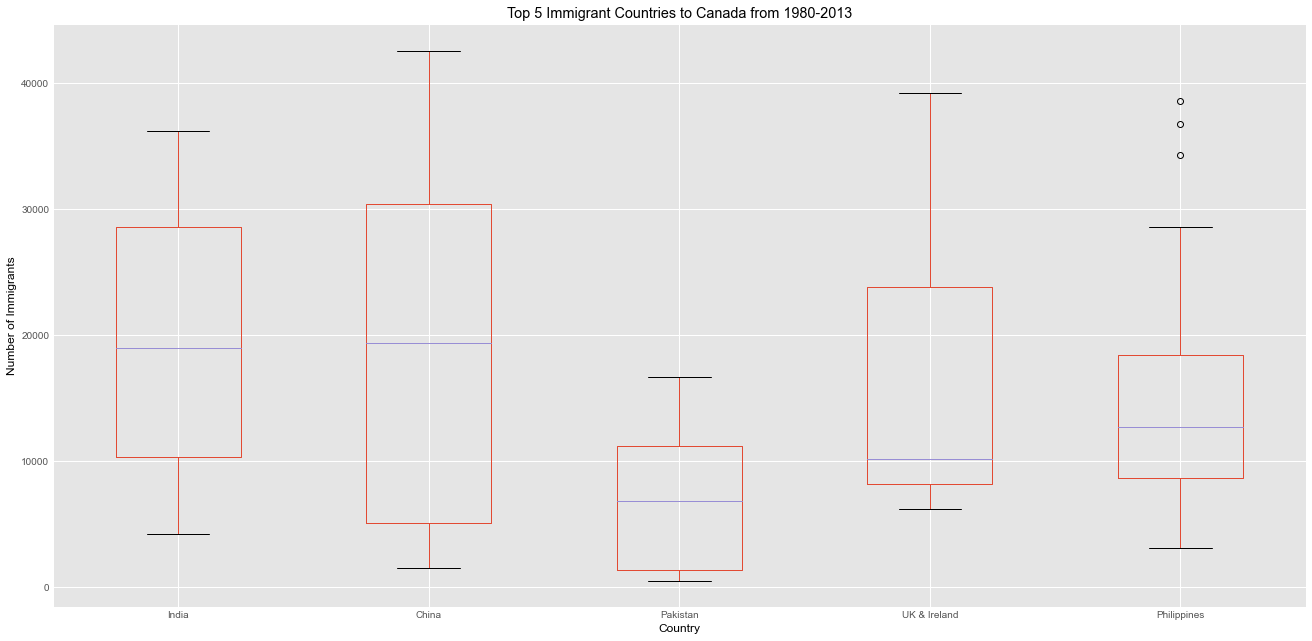

In [33]:
# Vertical Box Plot
style.use('ggplot')

data_box = pd.DataFrame(data.loc[['India', 'China', 'Pakistan', 'UK & Ireland', 'Philippines'], years].T)

data_box.plot(kind = 'box')
plt.title('Top 5 Immigrant Countries to Canada from 1980-2013', color = 'black')
plt.xlabel('Country', color='black')
plt.ylabel('Number of Immigrants', color = 'black')
plt.savefig('box_vertical.png')

plt.show()

Feel free to experiment and add any notes or observations here. <br><br><br><br><br>

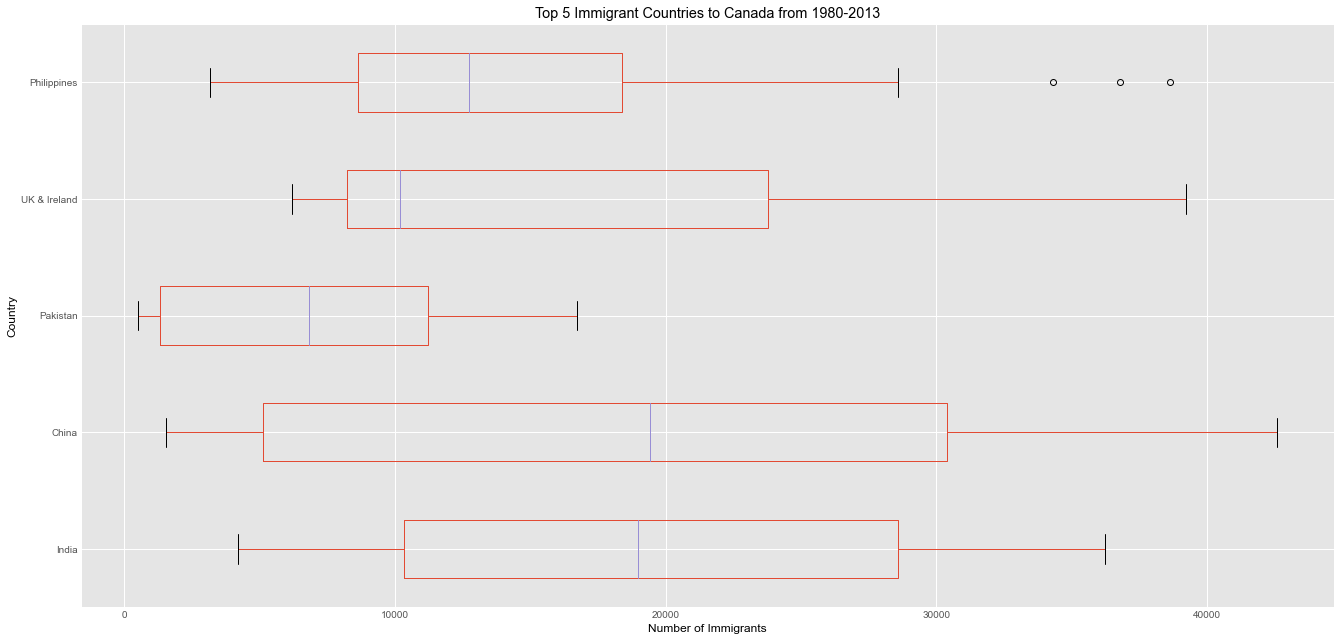

In [34]:
# horizontal box plot
data_box.plot(kind = 'box', vert = False)
plt.title('Top 5 Immigrant Countries to Canada from 1980-2013', color = 'black')
plt.ylabel('Country', color = 'black')
plt.xlabel('Number of Immigrants', color = 'black')
plt.savefig('box_horizontal.png')

plt.show()

Feel free to experiment and add any notes or observations here. <br><br><br><br><br>

#### Scatter Plot

With the newist version of Seaborn we have to specify x and y.

example: sb.scatterplot(x = 'sepal_length', y = 'sepal_width', data = df_iris)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


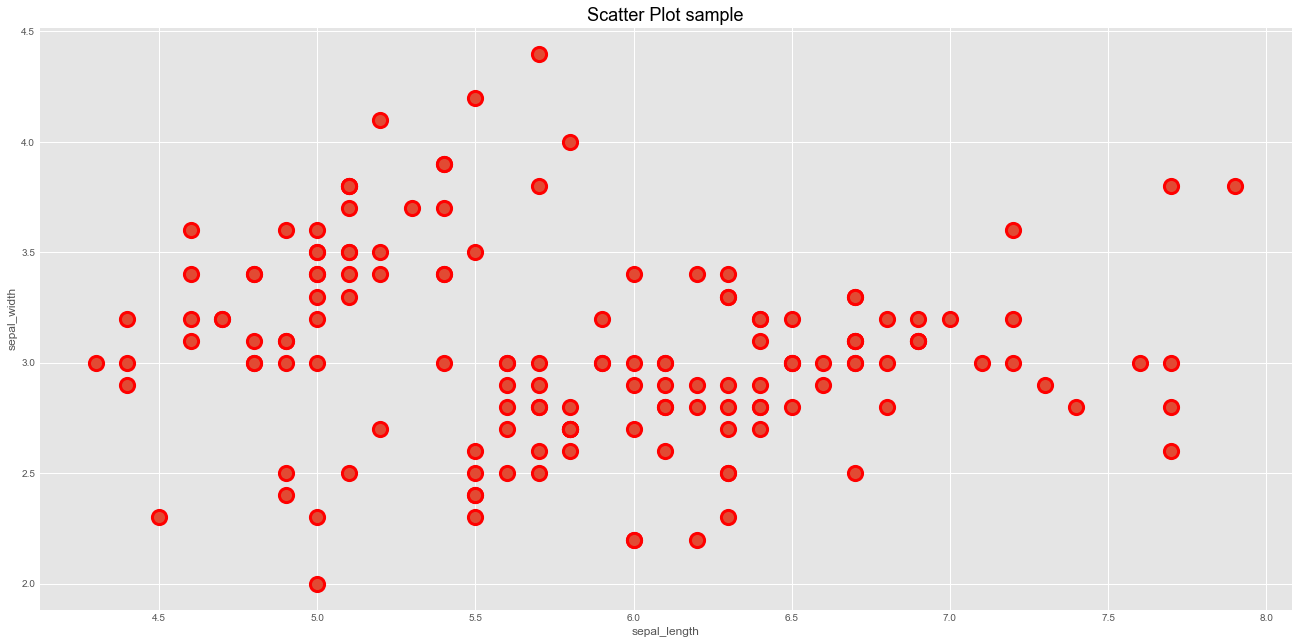

In [35]:
#scatter plot comparing sepal length to sepal width
import seaborn as sb
data_iris = sb.load_dataset('iris')

sb.scatterplot('sepal_length', 'sepal_width', data= data_iris, s=200, linewidth=3, edgecolor = 'Red')
plt.title('Scatter Plot sample', color = 'black', fontsize = 18)
plt.savefig('scatter.png')

plt.show()

Feel free to experiment and add any notes or observations here. <br><br><br><br><br>

#### Histogram

With the newist version of Seaborn they have deprecated distplot. Replace distplot with histplot and add kde = True

example:
sb.histplot(df_iris['sepal_length'], color = 'Red', label = 'Sepal Length', kde = True)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


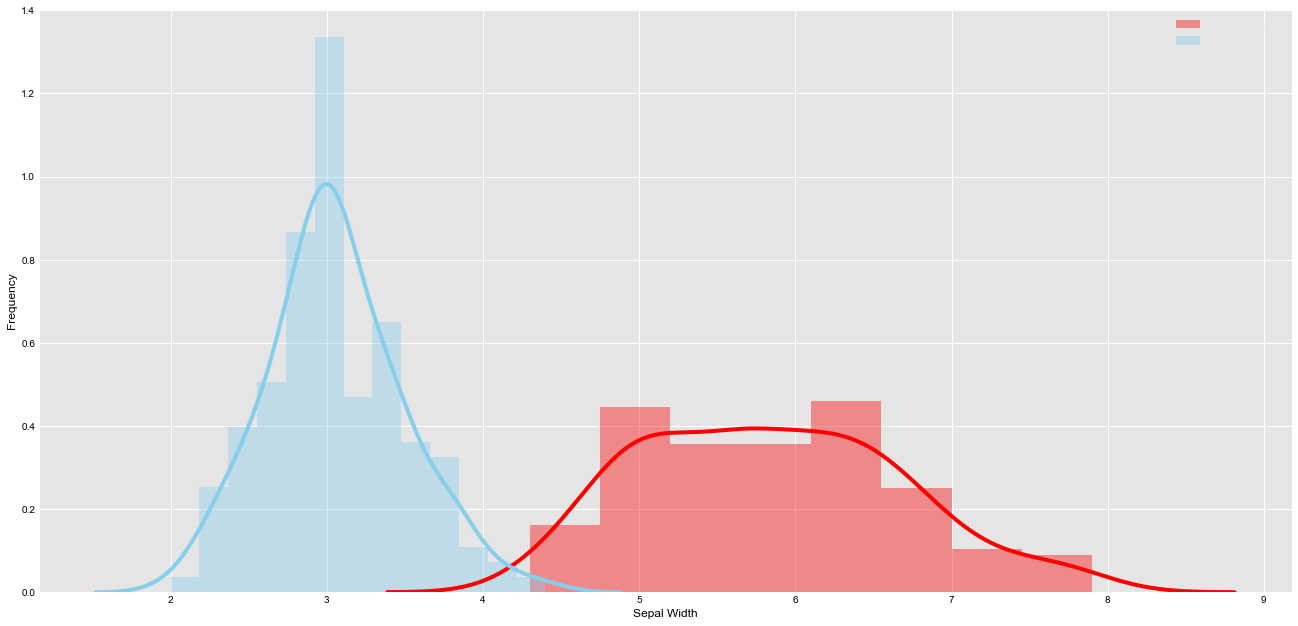

In [36]:
#Histogram side by side, with kde
data_iris = sb.load_dataset('iris')

sb.distplot(data_iris['sepal_length'], color = 'Red', label = 'Sepal Length')
sb.distplot(data_iris['sepal_width'], color = 'skyblue', label = 'Sepal Width')
plt.legend(fontsize=12)
plt.xlabel('Sepal Width', color= 'black')
plt.ylabel('Frequency', color = 'black')
plt.xticks(color ='black')
plt.yticks(color = 'black')
plt.savefig('historgram.png')

plt.show()

Feel free to experiment and add any notes or observations here. <br><br><br><br><br>

#### Bubble Plot

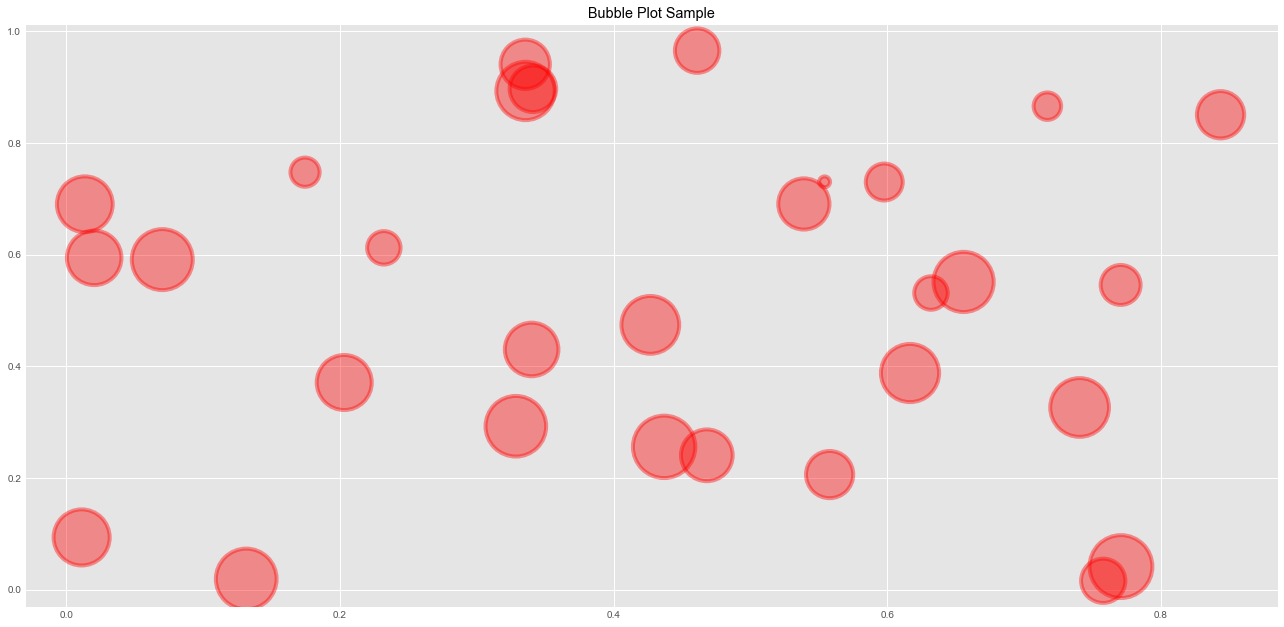

In [37]:
# Bubble Plot
x = np.random.rand(1,30,1)
y = np.random.rand(1, 30, 1)
size = np.random.rand( 1, 30 , 1)

plt.scatter(x, y, s = size*4000, alpha = 0.4, color = 'r', edgecolor = 'Red', linewidth = 4)
plt.title('Bubble Plot Sample', color = 'black')
plt.savefig('bubble.png')

plt.show()

Feel free to experiment and add any notes or observations here. <br><br><br><br><br>

#### Pie Chart

Skip this one as the code throws an error. 

df_pie = pd.DataFrame(df.groupby('continent')['total'].sum().T)
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode = [0,0.1,0,0,0.1,0.1]

plt.pie(df_pie, colors = colors, autopct = '%1.1f%%', startangle = 90, explode = explode, pctdistance = 1.12, shadow = True)
plt.title('Continent-Wise Immigrants Distribution', color = 'black', y = 1.1, fontsize = 18)
plt.legend(df_pie.index, loc = 'upper left', fontsize = 12)
plt.axis('equal')
plt.savefig('pie.png')

plt.show()

#### Doughnut Chart

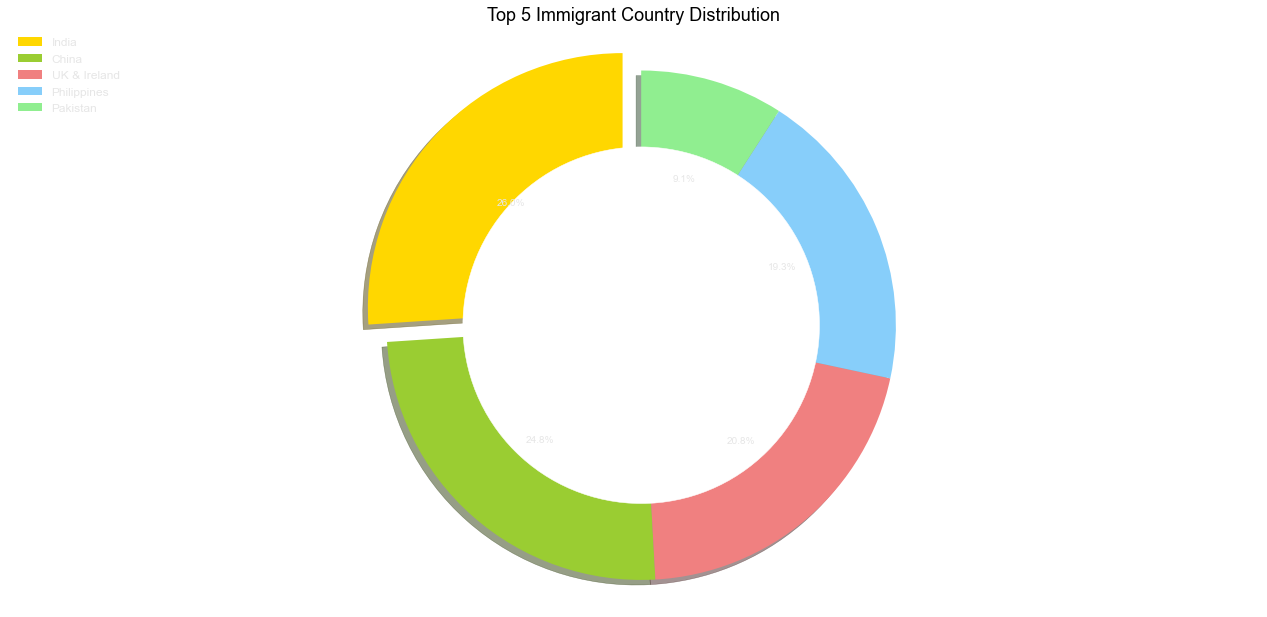

In [25]:
# Doughnut Chart
top5_list = data.nlargest(5, 'total').index.tolist()
df_top5 = pd.DataFrame(data.loc[top5_list, 'total'].T)
circle = plt.Circle( (0,0), 0.7, color='white')
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']

plt.pie(df_top5['total'], autopct = '%1.1f%%', shadow = True, explode = [0.1,0,0,0,0], colors = colors, startangle = 90)
fig = plt.gcf()
fig.gca().add_artist(circle)
plt.legend(df_top5.index, fontsize = 12, loc = 'upper left')
plt.title('Top 5 Immigrant Country Distribution', color = 'black', fontsize = 18)
plt.axis('equal')
plt.savefig('doughnut.png')

plt.show()

Feel free to experiment and add any notes or observations here. <br><br><br><br><br>

#### Regression Plot

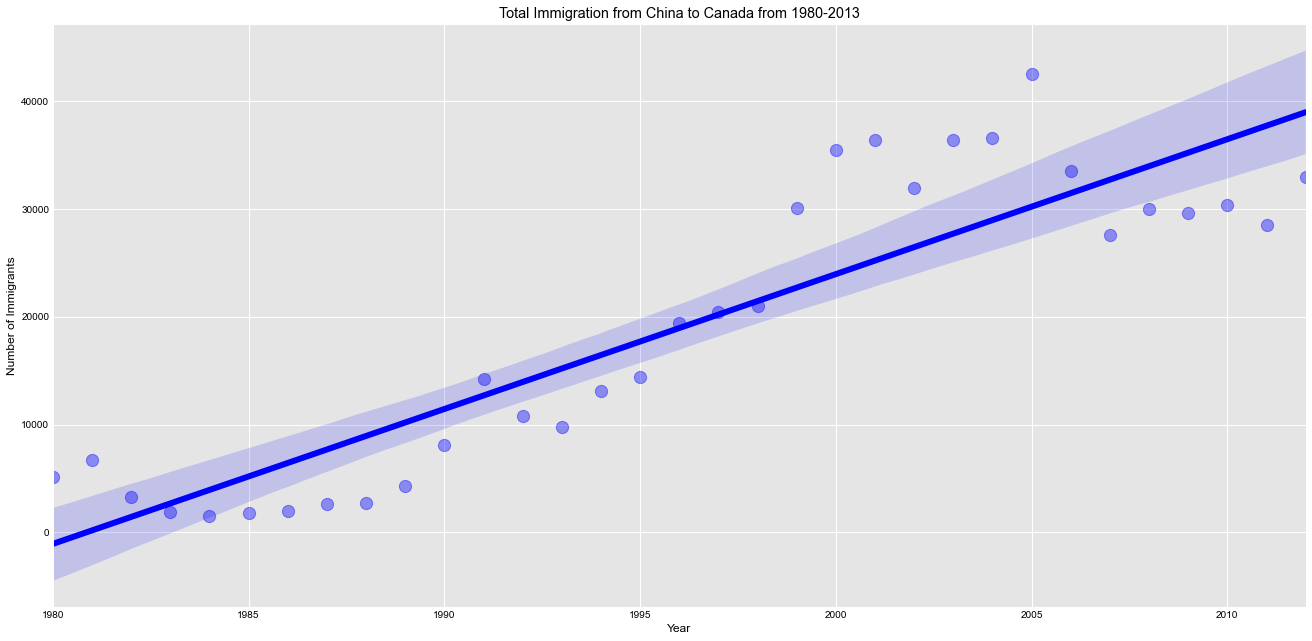

In [39]:
# Strong trend
data_reg = pd.DataFrame(data.loc['China', years])
data_reg.reset_index(inplace=True)
data_reg.rename(columns= {'index':'year'}, inplace=True)
data_reg[['year', 'China']] = data_reg[['year', 'China']].astype(int)

sb.regplot(x= 'year', y= 'China', data = data_reg, color = 'b', scatter_kws = {'s':150, 'alpha':0.4})
plt.title('Total Immigration from China to Canada from 1980-2013', color = 'black')
plt.xlabel('Year', color = 'black')
plt.ylabel('Number of Immigrants', color = 'black')
plt.xticks(color = 'black')
plt.yticks(color = 'black')
plt.savefig('reg_strong.png')

plt.show()

Feel free to experiment and add any notes or observations here. <br><br><br><br><br>

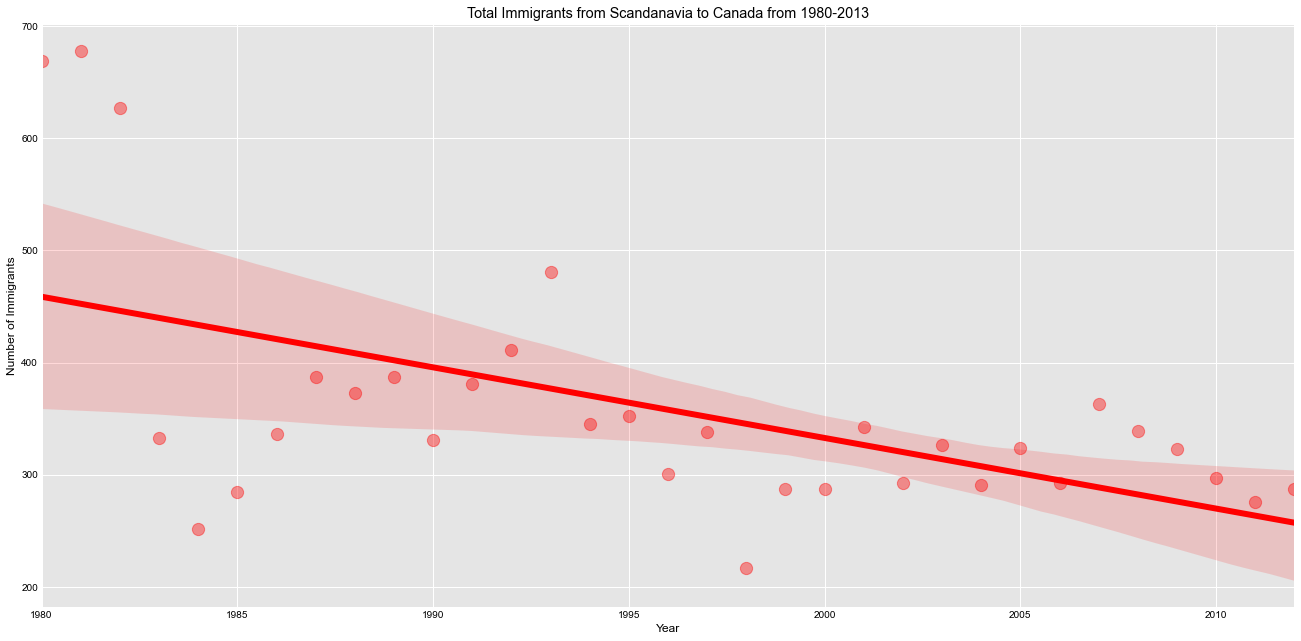

In [40]:
# Weak trend
data_reg1 = pd.DataFrame(data.loc[['Denmark', 'Norway', 'Sweden'], years].sum())
data_reg1.reset_index(inplace = True)
data_reg1.rename(columns= {'index': 'year', 0:'total'}, inplace=True)
data_reg1[['year', 'total']] = data_reg1[['year', 'total']].astype(int)

sb.regplot(x= 'year', y = 'total', data = data_reg1, color = 'Red', scatter_kws = {'s':150, 'alpha':0.4})
plt.title('Total Immigrants from Scandanavia to Canada from 1980-2013', color = 'black')
plt.xticks(color='black')
plt.yticks(color = 'black')
plt.xlabel('Year', color = 'black')
plt.ylabel('Number of Immigrants', color = 'black')
plt.savefig('reg_weak.png')
          
plt.show()

Feel free to experiment and add any notes or observations here. <br><br><br><br><br>

#### Word Cloud

You might need to pip install wordcloud and pip install Pywaffle.  Follow the instruction from when you installed cyperpunk earlier.

Make sure to add the txt files from [here](https://github.com/codinglikeagirl42/DataVisualizationPython) to your data folder and remember the path is data/filename.txt. Try creating your own txt file to visualize.

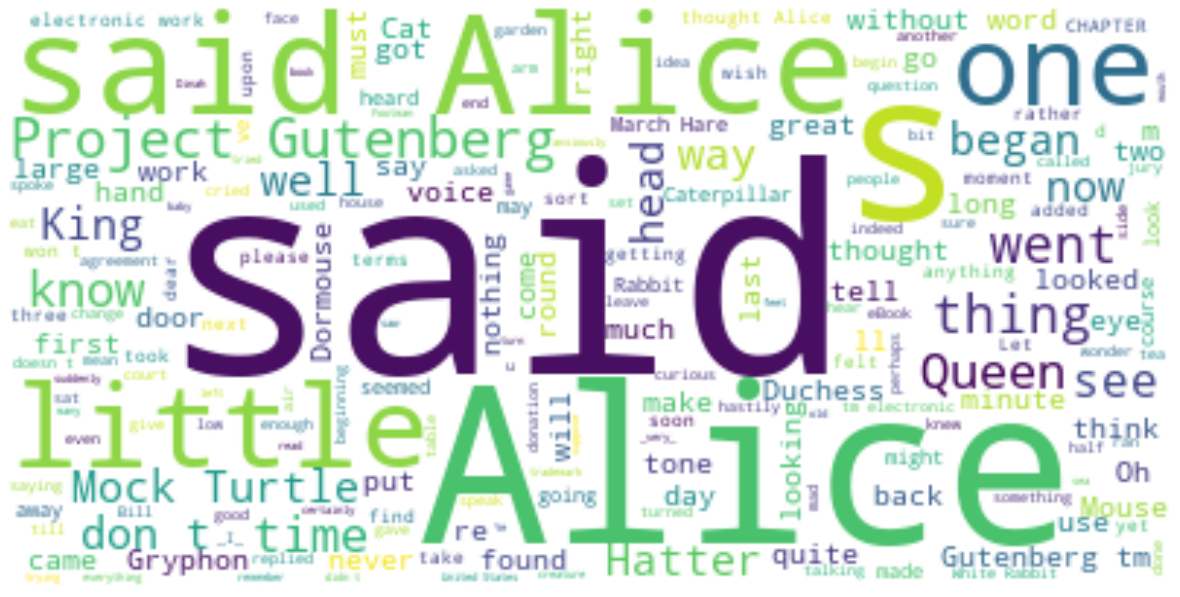

In [41]:
# word cloud
from wordcloud import WordCloud, STOPWORDS

text = open('data/Alice.txt', 'r', encoding = 'utf-8').read()
stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color = 'white', max_words = 200, stopwords = stopwords)

wordcloud.generate(text)
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.savefig('wordcloud.png')

plt.show()

Feel free to experiment and add any notes or observations here. <br><br><br><br><br>

#### Lollipop Chart

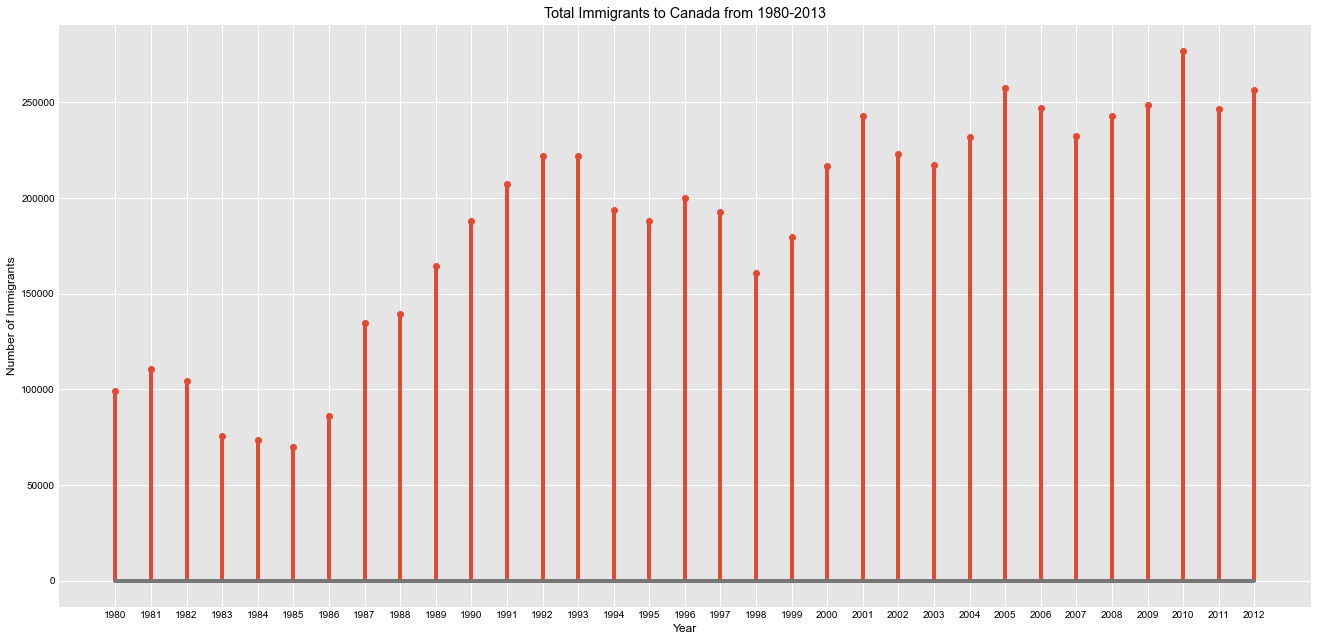

In [42]:
# Lollipop chart
plt.stem(data_tot.index, data_tot['total'])
plt.title('Total Immigrants to Canada from 1980-2013', color = 'black')
plt.xlabel('Year', color = 'black')
plt.ylabel('Number of Immigrants', color = 'black')
plt.xticks(color = 'black')
plt.yticks(color = 'black')
plt.savefig('lollipop.png')

plt.show()

Feel free to experiment and add any notes or observations here. <br><br><br><br><br>